In [1]:
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.widgets import Button, Slider

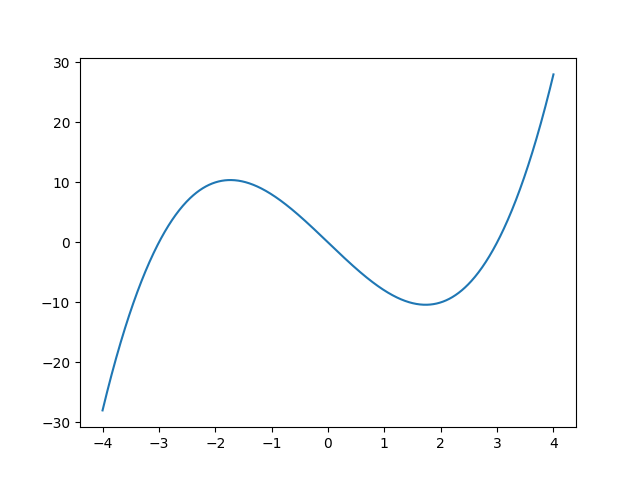

In [2]:
X = np.linspace(-4, 4, 1000)
Y = X * X * X - 9 * X
plt.plot(X, Y)
plt.show()

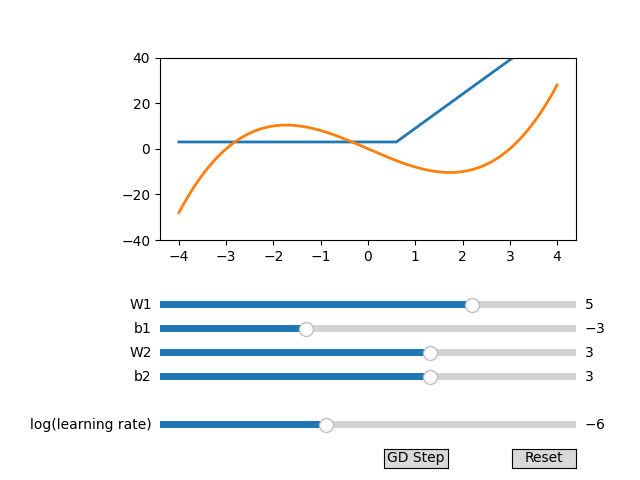

In [3]:
# The parametrized function to be plotted
def f(X, w1, w2, b1, b2):
    return w2 * np.maximum(w1 * X + b1, np.zeros_like(X)) + b2

# Define initial parameters
init_w1 = 5
init_w2 = 3
init_b1 = -3
init_b2 = 3
init_lr = -6

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(X, f(X, init_w1, init_w2, init_b1, init_b2), lw=2)
ax.plot(X, Y, lw=2)
ax.set_ylim(-40, 40)

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.5)

# Make a horizontal slider to control the frequency.
axw1 = fig.add_axes([0.25, 0.35, 0.65, 0.03])
w1_slider = Slider(
    ax=axw1,
    label='W1',
    valmin=-10,
    valmax=10,
    valinit=init_w1,
)

axb1 = fig.add_axes([0.25, 0.3, 0.65, 0.03])
b1_slider = Slider(
    ax=axb1,
    label='b1',
    valmin=-10,
    valmax=10,
    valinit=init_b1,
)

# Make a vertically oriented slider to control the amplitude
axw2 = fig.add_axes([0.25, 0.25, 0.65, 0.03])
w2_slider = Slider(
    ax=axw2,
    label="W2",
    valmin=-10,
    valmax=10,
    valinit=init_w2
)

axb2 = fig.add_axes([0.25, 0.2, 0.65, 0.03])
b2_slider = Slider(
    ax=axb2,
    label='b2',
    valmin=-10,
    valmax=10,
    valinit=init_b2,
)

axlr = fig.add_axes([0.25, 0.1, 0.65, 0.03])
lr_slider = Slider(
    ax = axlr,
    label="log(learning rate)",
    valmin=-10,
    valmax=0,
    valinit=init_lr
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(X, w1_slider.val, w2_slider.val, b1_slider.val, b2_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
w1_slider.on_changed(update)
w2_slider.on_changed(update)
b1_slider.on_changed(update)
b2_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')
learnax = fig.add_axes([0.6, 0.025, 0.1, 0.04])
learnbutton = Button(learnax, 'GD Step', hovercolor='0.975')


def reset(event):
    w1_slider.reset()
    w2_slider.reset()
    b1_slider.reset()
    b2_slider.reset()
button.on_clicked(reset)

def learn(event):
    w1 = w1_slider.val
    w2 = w2_slider.val
    b1 = b1_slider.val
    b2 = b2_slider.val
    lr = lr_slider.val
    h = np.maximum(w1 * X + b1, np.zeros_like(X))
    dw2 = 2 * np.dot(w2 * h + b2 - Y, h)
    db2 = 2 * np.dot(w2 * h + b2 - Y, np.ones_like(h))
    dw1 = 2 * np.dot(w2 * h + b2 - Y, w2 * np.where(w1 * X + b1 < 0, np.zeros_like(X), X))
    db1 = 2 * np.dot(w2 * h + b2 - Y, w2 * np.where(w1 * X + b1 < 0, np.zeros_like(X), np.ones_like(X)))
    w1_slider.set_val(w1 - (10 ** lr) * dw1)
    w2_slider.set_val(w2 - (10 ** lr) * dw2)
    b1_slider.set_val(b1 - (10 ** lr) * db1)
    b2_slider.set_val(b2 - (10 ** lr) * db2)
    line.set_ydata(f(X, w1_slider.val, w2_slider.val, b1_slider.val, b2_slider.val))
    fig.canvas.draw_idle()
learnbutton.on_clicked(learn)

plt.show()

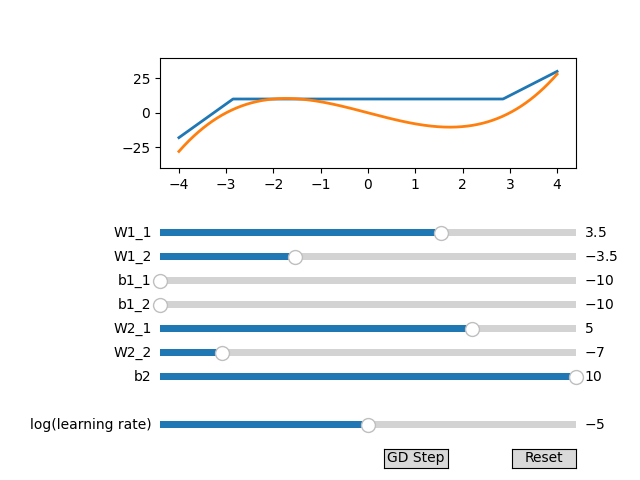

In [9]:
# The parametrized function to be plotted
def f(X, w1_1, w1_2, w2_1, w2_2, b1_1, b1_2, b2):
    return w2_1 * np.maximum(w1_1 * X + b1_1, np.zeros_like(X)) + w2_2 * np.maximum(w1_2 * X + b1_2, np.zeros_like(X)) + b2

# Define initial parameters
init_w1_1 = 3.5
init_w1_2 = -3.5
init_w2_1 = 5
init_w2_2 = -7
init_b1_1 = -10
init_b1_2 = -10
init_b2 = 10
init_lr = -5

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(X, f(X, init_w1_1, init_w1_2, init_w2_1, init_w2_2, init_b1_1, init_b1_2, init_b2), lw=2)
ax.plot(X, Y, lw=2)
ax.set_ylim(-40, 40)

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.65)

# Make a horizontal slider to control the frequency.
axw1_1 = fig.add_axes([0.25, 0.5, 0.65, 0.03])
w1_1_slider = Slider(
    ax=axw1_1,
    label='W1_1',
    valmin=-10,
    valmax=10,
    valinit=init_w1_1,
)

axw1_2 = fig.add_axes([0.25, 0.45, 0.65, 0.03])
w1_2_slider = Slider(
    ax=axw1_2,
    label='W1_2',
    valmin=-10,
    valmax=10,
    valinit=init_w1_2,
)

axb1_1 = fig.add_axes([0.25, 0.4, 0.65, 0.03])
b1_1_slider = Slider(
    ax=axb1_1,
    label='b1_1',
    valmin=-10,
    valmax=10,
    valinit=init_b1_1,
)

axb1_2 = fig.add_axes([0.25, 0.35, 0.65, 0.03])
b1_2_slider = Slider(
    ax=axb1_2,
    label='b1_2',
    valmin=-10,
    valmax=10,
    valinit=init_b1_2,
)

# Make a vertically oriented slider to control the amplitude
axw2_1 = fig.add_axes([0.25, 0.3, 0.65, 0.03])
w2_1_slider = Slider(
    ax=axw2_1,
    label="W2_1",
    valmin=-10,
    valmax=10,
    valinit=init_w2_1
)

axw2_2 = fig.add_axes([0.25, 0.25, 0.65, 0.03])
w2_2_slider = Slider(
    ax=axw2_2,
    label="W2_2",
    valmin=-10,
    valmax=10,
    valinit=init_w2_2
)


axb2 = fig.add_axes([0.25, 0.2, 0.65, 0.03])
b2_slider = Slider(
    ax=axb2,
    label='b2',
    valmin=-10,
    valmax=10,
    valinit=init_b2,
)

axlr = fig.add_axes([0.25, 0.1, 0.65, 0.03])
lr_slider = Slider(
    ax = axlr,
    label="log(learning rate)",
    valmin=-10,
    valmax=0,
    valinit=init_lr
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(X, w1_1_slider.val, w1_2_slider.val, w2_1_slider.val, w2_2_slider.val, b1_1_slider.val, b1_2_slider.val, b2_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
w1_1_slider.on_changed(update)
w1_2_slider.on_changed(update)
w2_1_slider.on_changed(update)
w2_2_slider.on_changed(update)
b1_1_slider.on_changed(update)
b1_2_slider.on_changed(update)
b2_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')
learnax = fig.add_axes([0.6, 0.025, 0.1, 0.04])
learnbutton = Button(learnax, 'GD Step', hovercolor='0.975')


def reset(event):
    w1_1_slider.reset()
    w1_2_slider.reset()
    w2_1_slider.reset()
    w2_2_slider.reset()
    b1_1_slider.reset()
    b1_2_slider.reset()
    b2_slider.reset()
button.on_clicked(reset)

def learn(event):
    w1_1 = w1_1_slider.val
    w1_2 = w1_2_slider.val
    w2_1 = w2_1_slider.val
    w2_2 = w2_2_slider.val
    b1_1 = b1_1_slider.val
    b1_2 = b1_2_slider.val
    b2 = b2_slider.val
    lr = lr_slider.val
    h_1 = np.maximum(w1_1 * X + b1_1, np.zeros_like(X))
    h_2 = np.maximum(w1_2 * X + b1_2, np.zeros_like(X))

    dw2_1 = 2 * np.dot(w2_1 * h_1 + b2 - Y, h_1)
    dw2_2 = 2 * np.dot(w2_2 * h_2 + b2 - Y, h_2)
    db2 = 2 * (np.dot(w2_1 * h_1 + b2 - Y, np.ones_like(h_1)) + np.dot(w2_2 * h_2 + b2 - Y, np.ones_like(h_2)))
    dw1_1 = 2 * np.dot(w2_1 * h_1 + b2 - Y, w2_1 * np.where(w1_1 * X + b1_1 < 0, np.zeros_like(X), X))
    db1_1 = 2 * np.dot(w2_1 * h_1 + b2 - Y, w2_1 * np.where(w1_1 * X + b1_1 < 0, np.zeros_like(X), np.ones_like(X)))
    dw1_2 = 2 * np.dot(w2_2 * h_2 + b2 - Y, w2_2 * np.where(w1_2 * X + b1_2 < 0, np.zeros_like(X), X))
    db1_2 = 2 * np.dot(w2_2 * h_2 + b2 - Y, w2_2 * np.where(w1_2 * X + b1_2 < 0, np.zeros_like(X), np.ones_like(X)))
    w1_1_slider.set_val(w1_1 - (10 ** lr) * dw1_1)
    w1_2_slider.set_val(w1_2 - (10 ** lr) * dw1_2)
    w2_1_slider.set_val(w2_1 - (10 ** lr) * dw2_1)
    w2_2_slider.set_val(w2_2 - (10 ** lr) * dw2_2)
    b1_1_slider.set_val(b1_1 - (10 ** lr) * db1_1)
    b1_2_slider.set_val(b1_2 - (10 ** lr) * db1_2)
    b2_slider.set_val(b2 - (10 ** lr) * db2)
    line.set_ydata(f(X, w1_1_slider.val, w1_2_slider.val, w2_1_slider.val, w2_2_slider.val, b1_1_slider.val, b1_2_slider.val, b2_slider.val))
    fig.canvas.draw_idle()
learnbutton.on_clicked(learn)

plt.show()